In [19]:
import math
import itertools
import numpy as np
import pylab as pl
import pandas as pd
import time
import gc
import matplotlib.pyplot as plt
import scipy
from __future__ import unicode_literals
%matplotlib inline

# punto 2

MergeSort

In [20]:
def merge(A, p, q, r):
    L = A[p:q+1]+[float('inf')]
    R = A[q+1:r+1]+[float('inf')]
    i = 0
    j = 0
    for k in range(p, r + 1):
        if L[i] <= R[j]:
            A[k] = L[i]
            i += 1
        else:
            A[k] = R[j]
            j += 1
            
def merge_sort_main(A, p, r):
    if p < r:
        q = int((p + r) / 2.0)
        merge_sort_main(A, p, q)
        merge_sort_main(A, q + 1, r)
        merge(A, p, q, r)

def merge_sort(A):
    t0 = time.clock()
    merge_sort_main(A, 0, len(A) - 1)
    return time.clock() - t0

def WC(A):
    if len(A) <= 1:
        return A
    if len(A) == 2:
        A[0],A[1] = A[1],A[0]
        return A
    i=0;j=0
    L = []; R = []
    while i < len(A):
        L.append(A[i])
        i+=2; j+=1
    i=1; j=0
    while i < len(A):
        R.append(A[i])
        i+=2; j+=1
    L = WC(L)
    R = WC(R)
    return L + R

Calculo de tiempos

In [21]:
def calcular_tiempos(sort,array):
    comp = [0]
    timesum = 0
    
    array_copy = list(array)
    tic = time.clock();
    sort(array_copy)
    toc = time.clock();
    timesum += toc - tic
    comp[0] = timesum
    return comp[0]

Calculo de tiempos merge-insertion

In [22]:
mejorIn=[]
medioIn=[]
peorIn=[]


mejorMe=[]
medioMe=[]
peorMe=[]
def test(a,b):
    
    for i in xrange(a, b+1, 4):
        time_inse = [0.0, 0.0, 0.0]
        time_merge = [0.0, 0.0, 0.0]
    
        for j in xrange(1000):
            mejor_inse = range(1,i+1)
            mejor_merge = range(1,i+1)
            medio_inse = list(np.random.permutation(i))
            medio_merge = medio_inse
            peor_inse = range(i,0,-1)
            peor_merge = WC(mejor_merge)
            
            time_inse[0] +=  calcular_tiempos(insertion_sort,list(mejor_inse))
            time_inse[1] += calcular_tiempos(insertion_sort,list(medio_inse))
            time_inse[2] += calcular_tiempos(insertion_sort,list(peor_inse))
            
            time_merge[0] += calcular_tiempos(merge_sort,list(mejor_merge))
            time_merge[1] += calcular_tiempos(merge_sort,list(medio_merge))
            time_merge[2] += calcular_tiempos(merge_sort,list(peor_merge))
        
        
        mejorIn.append(time_inse[0] / 1000)
        medioIn.append(time_inse[1] / 1000)
        peorIn.append(time_inse[2] / 1000)
        
        mejorMe.append(time_merge[0] / 1000)
        medioMe.append(time_merge[1] / 1000)
        peorMe.append(time_merge[2] / 1000)
        
test(1,100)



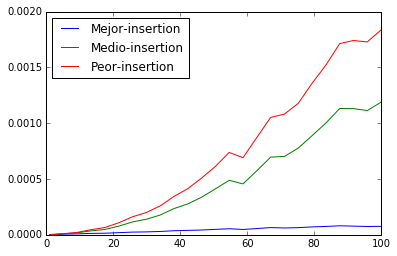

In [23]:
x = np.linspace(1,100,100/4)
plt.plot(x,mejorIn,x,medioIn,x,peorIn)
plt.legend(['Mejor-insertion','Medio-insertion','Peor-insertion'],loc='best')

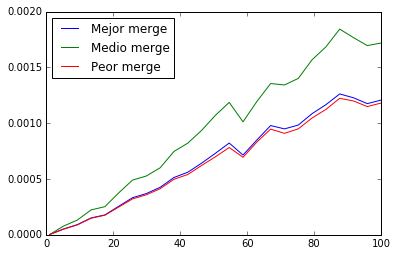

In [24]:

x = np.linspace(1,100,100/4)
plt.plot(x,mejorMe,x,medioMe,x,peorMe)
plt.legend(['Mejor merge','Medio merge','Peor merge'],loc='best')

peor merge-peor insertion 

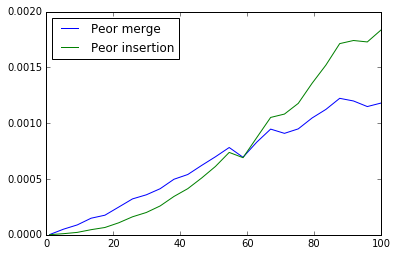

In [25]:
plt.plot(x,peorMe,x,peorIn)
plt.legend(['Peor merge','Peor insertion'],loc='best')

para el calculo de la constante k

In [26]:

def insertion_merge_sort(A, p, r):
    for j in range(p + 1, r + 1):
        pos = A[j]
        i = j - 1
        while (i >= p) and (A[i] > pos):
            A[i + 1] = A[i]
            i -= 1
        A[i + 1] = pos

            
def merge_insertion_main(A, p, r, k):
    if (r-p) <= k:
        insertion_merge_sort(A, p, r)
    else:
        if p < r:
            q = int((p + r) / 2.0)
            merge_insertion_main(A, p, q, k)
            merge_insertion_main(A, q + 1, r, k)
            merge(A, p, q, r)
            
def merge_insertion_sort(A,  k):
    t0 = time.clock()
    merge_insertion_main(A, 0, len(A) - 1, k)
    return time.clock() - t0

In [27]:
tin = []
tin2 = []
def prueba(a, b):
    for n in xrange(a, b+1, 4):
        tiempopromedmi = 0.0
        tiempopeormi = 0.0
        p=1000
        for i in xrange(p):
            A = np.random.permutation(n) 
            tiempopromedmi += merge_insertion_sort(list(A),140)
            tiempopeormi += merge_insertion_sort(list(A),55)
        tin.append(tiempopromedmi/p)
        tin2.append(tiempopeormi/p)

prueba(1,100)

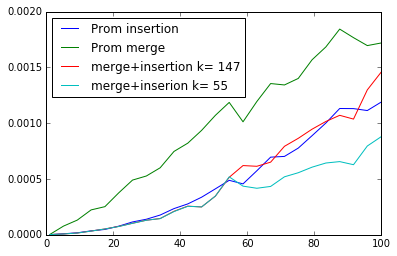

In [28]:
x = np.linspace(1,100,100/4)
plt.plot(x,medioIn,x,medioMe,x,tin,x,tin2)
plt.legend(['Prom insertion','Prom merge', 'merge+insertion k= 147', 'merge+inserion k= 55'],loc='best')